# Implementation for splitting, ROI masking, and segmentation

### 1. 작업할 이미지 불러오기

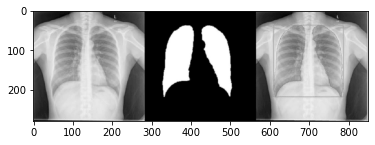

In [1]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt

image_path = './img/Lung-ROI-segmentation.png'
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
plt.figure()
plt.imshow(img, cmap=plt.cm.gray)

### 2. 이미지를 세개로 나누기

In [2]:
# 이미지를 ndarray형으로 만들고, 나누기 위한 Boundary를 할당
img2num = np.array(img)
boundary = img2num.shape[1] // 3 

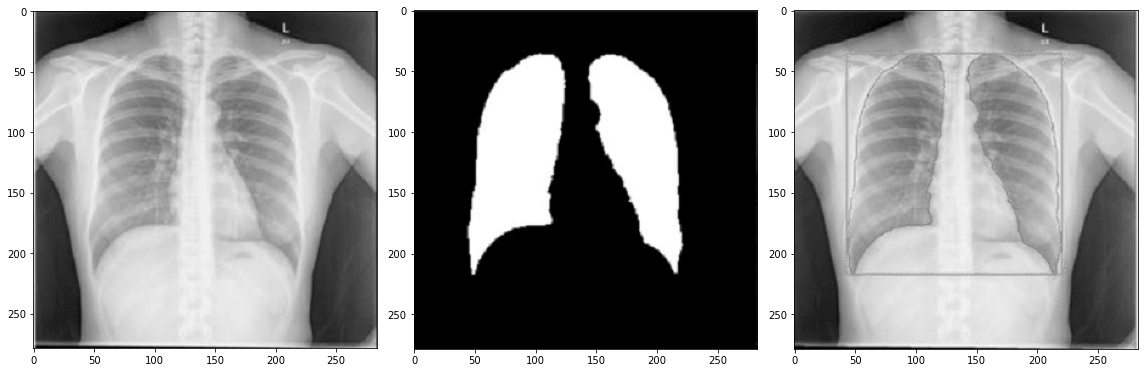

In [3]:
plt.figure(figsize=[16,8])
plt.subplot(131)
plt.imshow(img2num[:, :boundary+1],cmap=plt.cm.gray)
plt.subplot(132)
plt.imshow(img2num[:, boundary+1:(2*boundary)+1],cmap=plt.cm.gray)
plt.subplot(133)
plt.imshow(img2num[:, (2*boundary)+1:],cmap=plt.cm.gray)
plt.tight_layout()
plt.show()

In [4]:
print(img2num[:, :boundary].shape[1])
print(img2num[:, boundary:(2*boundary)].shape[1])
print(img2num[:, (2*boundary):].shape[1])

283
283
284


전체 열을 3으로 나눠줘서 쉽게 세개의 이미지로 나눌 수 있지만 경계선이 모호하기 때문에 다른 방법을 생각해보자

#### 다른 방법: 경계를 확실히 확인하기

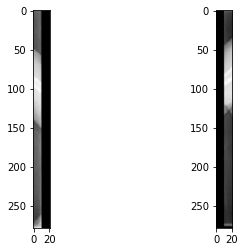

In [5]:
# 경계 주변만 뽑아내서 출력 후 확인한다. 그림으로만으로는 부족하니까 숫자로도 보자.
plt.subplot(121)
plt.imshow(img2num[:,boundary-10:boundary+11], cmap=plt.cm.gray)
plt.subplot(122)
plt.imshow(img2num[:,(2*boundary)-10:(2*boundary)+11], cmap=plt.cm.gray)

In [6]:
img2num[:,boundary-3:boundary+4]

array([[186, 195, 200, ..., 146, 151, 151],
       [107, 107,  87, ...,   0,   0,   0],
       [ 96,  96,  87, ...,   0,   0,   0],
       ...,
       [170, 170, 181, ...,   0,   0,   0],
       [186, 190, 200, ...,   0,   0,   0],
       [208, 217, 225, ...,   0,   0,   0]], dtype=uint8)

In [7]:
img2num[:,(2*boundary)-3:(2*boundary)+4]

array([[151, 151, 151, ..., 190, 190, 193],
       [  0,   0,  17, ...,  87,  87,  87],
       [  0,   0,   0, ...,  73,  73,  66],
       ...,
       [  0,   0,   0, ...,  60,  60,  54],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)

경계를 명확히 볼 수 있으니 이걸 기준으로 이미지를 나눈다.

In [8]:
image_left = img2num[:, :boundary+1]
image_middle = img2num[:, boundary+1:2*boundary]
image_right = img2num[:, (2*boundary):]

In [9]:
print(image_left.shape[1])
print(image_middle.shape[1])
print(image_right.shape[1])

284
282
284


이미지를 나누고 보니 크기가 다르다. image_middle에 양쪽에 패딩을 붙이는 방법이 있다. 하지만 image_left와 image_right의 양쪽 열을 하나씩 없애주는 방법이 더 간단하기 때문에 이 방법으로 하겠다.

In [10]:
image_left = image_left[:,1:-1]
image_right = image_right[:,1:-1]

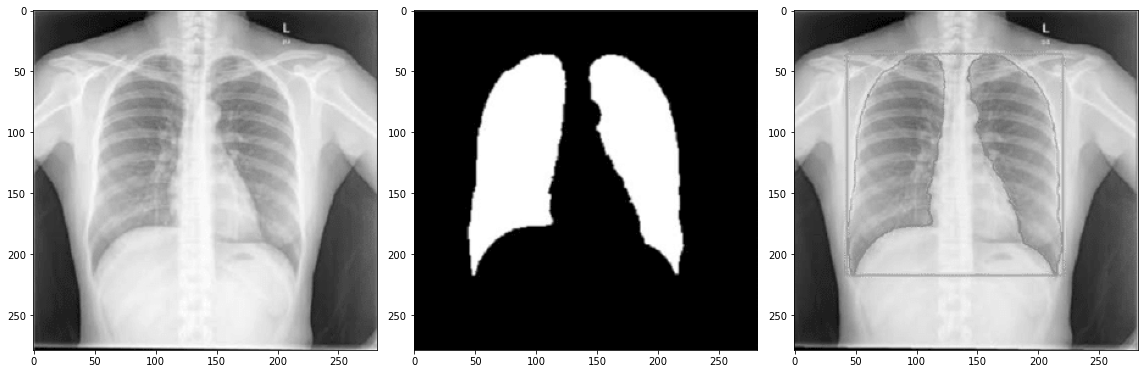

In [11]:
plt.figure(figsize=[16,8])
plt.subplot(131)
plt.imshow(image_left,cmap=plt.cm.gray)
plt.subplot(132)
plt.imshow(image_middle,cmap=plt.cm.gray)
plt.subplot(133)
plt.imshow(image_right,cmap=plt.cm.gray)
plt.tight_layout()
plt.show()

### 3. Region of Interest 추출하기

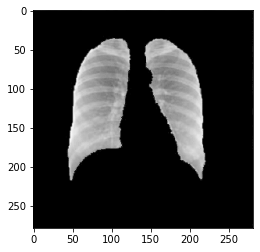

In [12]:
roi = cv2.bitwise_and(image_left,image_middle)
plt.imshow(roi,cmap=plt.cm.gray)
plt.show()